# Lab-5(Dissimilarity Matrix for Binary Attributes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
url="student-mat.csv"
df=pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#extract the dataset from the original dataset
dfs=df[['schoolsup','famsup','paid','activities','nursery','romantic','internet','higher']]
dfs.head()

,schoolsup,famsup,paid,activities,nursery,romantic,internet,higher
0,yes,no,no,no,yes,no,no,yes
1,no,yes,no,no,no,no,yes,yes
2,yes,no,yes,no,yes,no,yes,yes
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,no,no,yes


In [4]:
#convert binary into 0,1 format
dfs=dfs.replace('no',0)
dfs=dfs.replace(to_replace='yes',value=1)
dfs.head()

,schoolsup,famsup,paid,activities,nursery,romantic,internet,higher
0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,0,1,1
2,1,0,1,0,1,0,1,1
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,0,0,1


In [5]:
# create obj and find the distance or the dissimilarity matrix using scipy 
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)# -1 => numpy will calculate whatever will be the no. and 2 =>
n.shape

(395, 2)

In [6]:
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape

(395, 2)

In [7]:
from scipy.spatial import distance

In [8]:
dist_matrix=distance.cdist(n,m)
dist_matrix.shape


(395, 395)

In [9]:
print(dist_matrix)

[[1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 ...
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]]


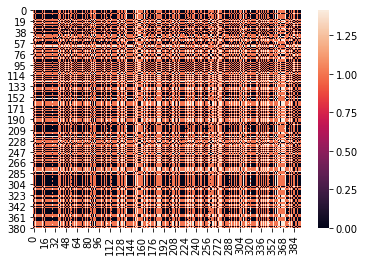

In [10]:
sbs.heatmap(dist_matrix)
plt.show()

In [11]:
#numerical attribute
#extract
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [12]:
numeric=df[['age','Medu','Fedu','studytime','failures']]
numeric.head()

,age,Medu,Fedu,studytime,failures
0,18,4,4,2,0
1,17,1,1,2,0
2,15,1,1,2,3
3,15,4,2,3,0
4,16,3,3,2,0


In [13]:
num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [14]:
num2=np.array(numeric[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [15]:
#Euclidean distance
dist_matrix=distance.cdist(num1,num2)
print(dist_matrix)

[[14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [13.60147051 16.03121954 16.03121954 ... 16.03121954 15.29705854
  16.03121954]
 [11.04536102 14.14213562 14.14213562 ... 14.14213562 13.
  14.14213562]
 ...
 [17.02938637 20.09975124 20.09975124 ... 20.09975124 19.
  20.09975124]
 [14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [15.5241747  18.02775638 18.02775638 ... 18.02775638 17.2626765
  18.02775638]]


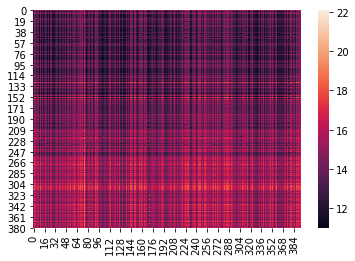

In [16]:
sbs.heatmap(dist_matrix)
plt.show()

In [17]:
#Nominal Attributes(name or chars or string)
nomi=df[['Mjob','Fjob','reason','guardian']]
nomi.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [18]:
nomi=nomi.replace('at_home','home')
nomi.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [19]:
# 1st convert into categorical/ ordinal 
nomi=nomi.astype('category')

In [20]:
# labelencoder gives a unique and normalised nalue like from 0,1,2 etc
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [21]:
#fit the labelencoder and return the label value
nomi['guardian']=lb.fit_transform(nomi['guardian'])
nomi['Mjob']=lb.fit_transform(nomi['Mjob'])
nomi['Fjob']=lb.fit_transform(nomi['Fjob'])
nomi['reason']=lb.fit_transform(nomi['reason'])


In [22]:
nomi.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [23]:
nom1=np.array(nomi)
nom1.reshape(-1,2)
nom1.shape

(395, 4)

In [24]:
nom2=np.array(nomi)
nom2.reshape(-1,2)
nom2.shape

(395, 4)

In [25]:
dist_matrix2=distance.cdist(nom1,nom2)
dist_matrix2.shape

(395, 395)

In [26]:
print(dist_matrix2)

[[0.         2.23606798 2.82842712 ... 2.44948974 2.82842712 3.31662479]
 [2.23606798 0.         2.23606798 ... 2.23606798 2.23606798 1.41421356]
 [2.82842712 2.23606798 0.         ... 2.44948974 2.82842712 2.64575131]
 ...
 [2.44948974 2.23606798 2.44948974 ... 0.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.82842712 ... 1.41421356 0.         1.73205081]
 [3.31662479 1.41421356 2.64575131 ... 2.23606798 1.73205081 0.        ]]


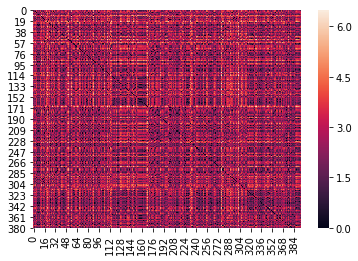

In [27]:
sbs.heatmap(dist_matrix2)
plt.show()